# FairPair Demo

In [1]:
import numpy as np
import networkx as nx
import matplotlib as plt

from fairpair import *

## Create graph with labeled nodes

In [2]:
# Initialize the graph with nodes labeled majority or minority
G = FairPairGraph()
G.generate_groups(500, 200)

for i in range(298, 303):
    print(G.nodes(data=True)[i])

{'minority': False}
{'minority': False}
{'minority': True}
{'minority': True}
{'minority': True}


In [3]:
# Add randomization to the group label attribution
G = FairPairGraph()
G.add_nodes_from(np.arange(500))
G.label_minority(200, random=True)

for i in range(5):
    print(G.nodes(data=True)[i])

{'minority': True}
{'minority': True}
{'minority': True}
{'minority': False}
{'minority': False}


In [4]:
# Access the minority subgraph (read-only)
G.minority

In [5]:
# Access the majority nodes
G.majority_nodes[:20]

[3, 4, 5, 6, 7, 9, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31]

## Assign scores per group

In [6]:
# Assign scores to the majority and minority respectively
G.group_assign_scores(nodes=G.majority_nodes, distr=Distributions.normal_distr)
G.group_assign_scores(nodes=G.minority_nodes, distr=Distributions.normal_distr, loc=0.4) # give a disadvantage to the minority
G.nodes(data=True)[11]

{'minority': True, 'score': 0.1704037825074091}

## Compare Pairs

In [7]:
# Compare pairs using the BTL-model
print('before:', G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))
G.compare_pair(1, 5, k=30)
print('after:', G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))

before: 0.12712751875254913 0.3891051009625218 []
after: 0.12712751875254913 0.3891051009625218 [(1, 5, {'wins': 24, 'weight': 0.8}), (5, 1, {'wins': 6, 'weight': 0.19999999999999996})]


In [8]:
# Sum up additional comparisons with already existing ones
G.compare_pair(1, 5, k=30)
print(G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))

0.12712751875254913 0.3891051009625218 [(1, 5, {'wins': 49, 'weight': 0.8166666666666667}), (5, 1, {'wins': 11, 'weight': 0.18333333333333335})]


## Random Sampling
For a comparison of sampling techniques, see also [sampling.ipynb](./sampling.ipynb).

In [9]:
random_list_to_pairs(G, range(11))

/var/folders/xh/r84_yqtx7pj262lm0s8w56640000gn/T/ipykernel_11146/3850484033.py:1: UserWarning: Deleting one element to create pairs from list of uneven length
  random_list_to_pairs(G, range(11))


[(2, 7), (9, 3), (5, 1), (8, 6), (10, 4)]

In [10]:
# Generate a new Graph to test random sampling
G = FairPairGraph()
G.generate_groups(20, 5)
G.group_assign_scores(nodes=G.majority_nodes, distr=Distributions.normal_distr)
G.group_assign_scores(nodes=G.minority_nodes, distr=Distributions.normal_distr, loc=0.1) # give a disadvantage to the minority

In [11]:
sampling = RandomSampling(G)
sampling.apply(iter = 20)
print('minority success rate:', round(np.mean([rate for node, rate in G.minority.success_rates]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in G.majority.success_rates]), 2))

minority success rate: 0.2
majority success rate: 0.49


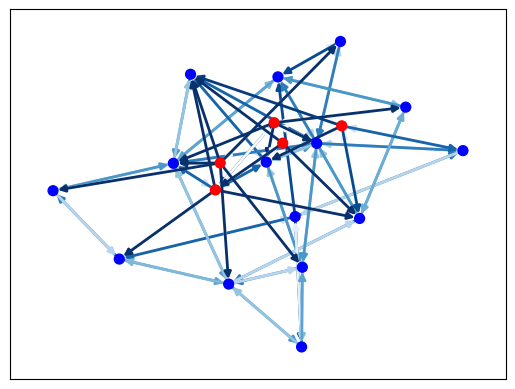

In [12]:
pos=nx.drawing.layout.spring_layout(G)
colors = ['red' if node[1]['minority'] else 'blue' for node in G.nodes(data=True)]
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.drawing.nx_pylab.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=50, edge_color=weights, width=2, edge_cmap=plt.cm.Blues)

In [13]:
for node in G.nodes(data=True):
    node[1]['minority'] = bool(node[1]['minority']) # convert from numpy
nx.write_gexf(G, './data/fairpairgraphtest.gexf')

## Star Graph Sampling
Creates a Star Graph with variable "stariness" through parameter `node_prob`, i.e. with a certain chance allows connections between nodes other than the center node as well with.

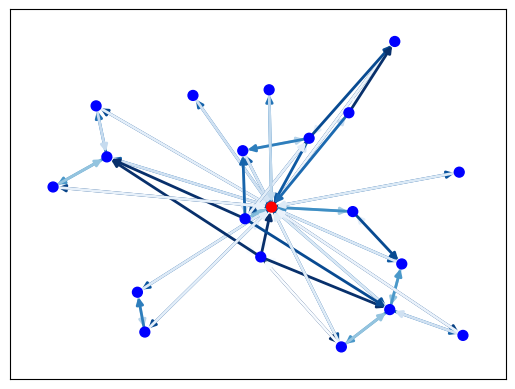

In [14]:
G = FairPairGraph()
G.generate_groups(20, 0)
G.group_assign_scores(G.nodes)
sampling = StargraphSampling(G)
sampling.apply(iter = 30, node_prob=0.8)
pos=nx.drawing.layout.spring_layout(G)
#colors = ['red' if node[1]['minority'] else 'blue' for node in G.nodes(data=True)]
colors = ['red' if node == 0 else 'blue' for node in G.nodes]
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.drawing.nx_pylab.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=50, edge_color=weights, width=2, edge_cmap=plt.cm.Blues)